# **Executive Summary**

## **Project Title: Predictive Maintenance for Vehicles Using Machine Learning**

### **Overview:**
The objective of this project is to develop a machine learning model that predicts the maintenance needs of vehicles based on various characteristics. By analyzing features such as mileage, vehicle age, maintenance history, and fuel type, this model aims to assist fleet managers and individual vehicle owners in scheduling timely maintenance. The ultimate goal is to enhance vehicle performance and reduce the risk of unexpected breakdowns, thereby improving operational efficiency and safety.

### **Project Description:**
In the automotive industry, maintaining vehicle performance and preventing failures are critical for ensuring safety and reducing operational costs. Predictive maintenance offers significant cost-saving opportunities and allows for better resource allocation. This project leverages historical data related to vehicle characteristics and maintenance history to predict whether a vehicle requires maintenance (1 = Yes, 0 = No). The key focus is to develop a model that can proactively identify when a vehicle is likely to need servicing, helping avoid costly breakdowns and improve operational efficiency.

---

### **Dataset Overview:**
**Dataset Link:**  
[Vehicle Maintenance Data](#)

### **Data Dictionary:**
| Feature                | Description                                          | Data Type   | Example Values                     |
|------------------------|------------------------------------------------------|-------------|------------------------------------|
| Vehicle_Model           | Type of the vehicle (e.g., Car, SUV, Truck)          | Categorical | Car, SUV, Truck                   |
| Mileage                | Total mileage covered by the vehicle                 | Numeric     | 15,000, 35,000, 120,000           |
| Maintenance_History     | Quality of previous maintenance                     | Categorical | Good, Average, Poor               |
| Vehicle_Age            | Age of the vehicle in years                          | Numeric     | 1, 5, 10                         |
| Fuel_Type              | Type of fuel used by the vehicle (e.g., Gasoline)    | Categorical | Gasoline, Diesel                  |
| Last_Service_Date      | Date of the last service performed                   | Date        | 2023-06-15                       |
| Engine_Health          | Status of engine health                              | Categorical | Good, Fair, Poor                  |
| Tire_Condition         | Condition of the tires                               | Categorical | New, Worn                         |
| Weather_Conditions     | Conditions during the last trip                      | Categorical | Sunny, Rainy, Snowy               |
| Driving_Style          | Style of driving                                     | Categorical | Aggressive, Moderate              |
| Last_Fuel_Consumption  | Fuel consumption during the last trip                | Numeric     | 25, 18.5, 22                      |

---

### **Evaluation and Summary of the XGBoost Model**

#### **1. Confusion Matrix:**
- The confusion matrix shows **no false positives** and **no false negatives**.
  - **2,855** instances where the vehicle **doesn't need maintenance** are correctly classified (True Negatives).
  - **12,145** instances where the vehicle **needs maintenance** are correctly classified (True Positives).
- This indicates a perfect classification by the XGBoost model.

#### **2. ROC Curve and AUC:**
- The **ROC curve** shows an **AUC (Area Under the Curve) of 1.00**, representing perfect classification performance.
- The curve reaches the top-left corner, indicating that the model is highly effective at distinguishing between vehicles needing maintenance and those not needing it.

#### **3. Feature Importance Analysis:**
- The most important features influencing the model’s predictions are:
  1. **Battery_Status**
  2. **Brake_Condition**
  3. **Reported_Issues**
  4. **Maintenance_History**
  5. **Accident_History**
- These features carry the most weight in determining whether a vehicle will require maintenance.
- Other features such as **Fuel Efficiency**, **Odometer Reading**, and **Transmission Type** have much lower importance in comparison.

#### **4. Model Performance Metrics:**
- The model achieved perfect scores across all performance metrics:
  - **Accuracy**: 1.00
  - **Precision**: 1.00
  - **Recall**: 1.00
  - **F1 Score**: 1.00
- These results suggest that the model predicts whether a vehicle requires maintenance without making any errors.

#### **Conclusion:**
The **XGBoost Classifier** performed exceptionally well, achieving **perfect classification** on the test data. However, such high scores may indicate potential **overfitting**, meaning the model might not generalize as well on unseen data. Despite this, the model's feature importance shows a reasonable distribution of influential factors, with **Battery_Status** and **Brake_Condition** playing key roles in the predictions.

---

### **Data Processing and Analysis Steps**

**1. Distribution Analysis of Maintenance History**:
   - **Objective**: Analyze the distribution of **Maintenance_History** and its impact on maintenance needs.
   - **Actions**: Perform groupby operations to summarize maintenance needs by **Maintenance_History** and visualize the distributions using box plots or count plots.

**2. Correlation Analysis**:
   - **Objective**: Assess how **Mileage** correlates with the likelihood of requiring maintenance.
   - **Actions**: Calculate correlation coefficients between **Mileage** and **Need_Maintenance**. Create scatter plots and heatmaps to visualize relationships.

**3. Influence of External Factors**:
   - **Objective**: Investigate how **Weather_Conditions** and **Driving_Style** affect maintenance needs.
   - **Actions**: Use statistical tests (e.g., chi-square test) to assess associations between categorical variables and **Need_Maintenance**. Create visualizations to display trends and patterns.

**4. Time-Series Analysis of Vehicle Age**:
   - **Objective**: Determine how **Vehicle Age** influences maintenance requirements over time.
   - **Actions**: Aggregate data by vehicle age and calculate the percentage of vehicles needing maintenance. Use line plots to visualize trends over time.

**5. Feature Importance Analysis**:
   - **Objective**: Identify which vehicle features are most predictive of maintenance needs.
   - **Actions**: Utilize methods such as **Random Forest** or **XGBoost** to compute feature importances and visualize them using bar charts.

---

### **Conclusion**
This project aims to utilize machine learning techniques to predict vehicle maintenance needs, offering significant advantages for fleet management and individual vehicle owners. By addressing the outlined data processing and analysis steps, we can derive actionable insights that will aid in the implementation of effective predictive maintenance strategies. The resulting model is expected to be a valuable tool for improving vehicle reliability and efficiency in the automotive industry.


In [1]:
# Import all libraries

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from scipy import stats
from io import StringIO
import time


In [2]:
# Import dataset

df = pd.read_csv('/kaggle/input/vehicle-maintenance-data/vehicle_maintenance_data.csv')

# Confirm dataset loaded
df.head()

Vehicle_Model  Mileage Maintenance_History  Reported_Issues  Vehicle_Age  \
0         Truck    58765                Good                0            4   
1           Van    60353             Average                1            7   
2           Bus    68072                Poor                0            2   
3           Bus    60849             Average                4            5   
4           Bus    45742                Poor                5            1   

  Fuel_Type Transmission_Type  Engine_Size  Odometer_Reading  \
0  Electric         Automatic         2000             28524   
1  Electric         Automatic         2500            133630   
2  Electric         Automatic         1500             34022   
3    Petrol         Automatic         2500             81636   
4    Petrol            Manual         2000             97162   

  Last_Service_Date Warranty_Expiry_Date Owner_Type  Insurance_Premium  \
0        2023-11-23           2025-06-24     Second              20782   
1        2023-09-21           2025-06-04     Second              23489   
2        2023-06-27           2025-04-27      First              17979   
3        2023-08-24           2025-11-05     Second               6220   
4        2023-05-25           2025-09-14      Third              16446   

   Service_History  Accident_History  Fuel_Efficiency Tire_Condition  \
0                6                 3        13.622204            New   
1                7                 0        13.625307            New   
2                7                 0        14.306302            New   
3                7                 3        18.709467            New   
4                6                 2        16.977482           Good   

  Brake_Condition Battery_Status  Need_Maintenance  
0             New           Weak                 1  
1             New           Weak                 1  
2            Good           Weak                 1  
3        Worn Out            New                 1  
4            Good           Weak                 1

## **Data Preprocessing**

In [3]:
# Dataset details and summary statistics

print(df.info())

# Categorical Summary Statistics
print(f'Categorical Summary Statistics \ndf.describe(include= object).T\n')

# Numerical Summary Statistics
print(f'Numerical Summary Statistics \ndf.describe(include= np.number).T\n')

# Isolate numerical variables
numeric_df = df.select_dtypes(include=np.number)

# Isolate categorical variables
categorical_df = df.select_dtypes(include=object)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [4]:
# Confirm outliers for Numerical variables
def highlight_outliers(s):
    '''
    Highlight values that are outside of 3 standard deviations from the mean.
    '''
    is_outlier = (np.abs(s - s.mean()) > 3 * s.std())
    return ['background-color: red' if v else '' for v in is_outlier]

# Apply function
numeric_df = df.select_dtypes(include=np.number)
styled_df = numeric_df.describe().T.style.apply(highlight_outliers)
styled_df


# **Univariate Analysis**

In [5]:
# Distribution of numeric variables

import plotly.subplots as sp
import plotly.graph_objects as go

# isolating numeric variables
numeric_df = df.select_dtypes(include=np.number)

for column in numeric_df.columns:
    # Summary statistics
    print(f"Summary Statistics for {column}:\n{numeric_df[column].describe()}\n")

    # Create subplots
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=(f"Histogram of {column}", f"Box Plot of {column}"))

    # Histogram
    fig.add_trace(go.Histogram(x=numeric_df[column]), row=1, col=1)

    # Box plot
    fig.add_trace(go.Box(y=numeric_df[column]), row=1, col=2)

    fig.update_layout(height=600, width=1000, title_text=f"Plots for {column}", showlegend=False)
    fig.show()

Summary Statistics for Mileage:
count    50000.000000
mean     54931.232680
std      14401.912925
min      30001.000000
25%      42471.500000
50%      54810.000000
75%      67391.500000
max      80000.000000
Name: Mileage, dtype: float64



Summary Statistics for Reported_Issues:
count    50000.000000
mean         2.497420
std          1.708781
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: Reported_Issues, dtype: float64



Summary Statistics for Vehicle_Age:
count    50000.000000
mean         5.492260
std          2.875682
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Vehicle_Age, dtype: float64



Summary Statistics for Engine_Size:
count    50000.000000
mean      1556.292000
std        627.677218
min        800.000000
25%       1000.000000
50%       1500.000000
75%       2000.000000
max       2500.000000
Name: Engine_Size, dtype: float64



Summary Statistics for Odometer_Reading:
count     50000.000000
mean      75551.187060
std       43088.105658
min        1001.000000
25%       38009.000000
50%       75598.500000
75%      112999.500000
max      149999.000000
Name: Odometer_Reading, dtype: float64



Summary Statistics for Insurance_Premium:
count    50000.000000
mean     17465.340700
std       7223.393401
min       5000.000000
25%      11189.750000
50%      17477.500000
75%      23692.000000
max      30000.000000
Name: Insurance_Premium, dtype: float64



Summary Statistics for Service_History:
count    50000.000000
mean         5.515560
std          2.874899
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: Service_History, dtype: float64



Summary Statistics for Accident_History:
count    50000.00000
mean         1.50156
std          1.11951
min          0.00000
25%          0.00000
50%          2.00000
75%          3.00000
max          3.00000
Name: Accident_History, dtype: float64



Summary Statistics for Fuel_Efficiency:
count    50000.000000
mean        14.990323
std          2.885583
min         10.000098
25%         12.489037
50%         14.986352
75%         17.474676
max         19.999968
Name: Fuel_Efficiency, dtype: float64



Summary Statistics for Need_Maintenance:
count    50000.000000
mean         0.809960
std          0.392336
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Need_Maintenance, dtype: float64



# **Summary Insights from Univariate Analysis for Numeric Variables**

1. **Mileage & Odometer Reading**:
   - The average mileage is **54,931 km**, with most vehicles ranging from **42,471 km to 67,391 km**.
   - The average odometer reading is **75,551 km**, indicating regular usage and suggesting potential wear and tear.

2. **Vehicle Age**:
   - Vehicles are relatively young, with an average age of **5.5 years**.
   - Most vehicles are less than **8 years old**, which may imply less maintenance required compared to older vehicles.

3. **Reported Issues**:
   - On average, vehicles report approximately **2.5 issues**, with most reporting between **1 and 4 issues**, indicating common maintenance needs.

4. **Engine Size**:
   - The average engine size is **1,556 cc**, with a majority falling between **1,000 cc and 2,000 cc**, reflecting a diverse range of vehicle types.

5. **Insurance Premium**:
   - The average insurance premium is around **17,465**, suggesting significant costs associated with vehicle ownership and maintenance.

6. **Service History**:
   - Vehicles have undergone an average of **5.5 services**, with most having between **3 and 8 services**, highlighting a commitment to regular maintenance.

7. **Accident History**:
   - The average number of accidents reported is **1.5**, with most vehicles having no more than **3 accidents**, indicating a relatively safe fleet.

8. **Fuel Efficiency**:
   - The average fuel efficiency stands at **14.99 km/l**, suggesting decent performance, with most vehicles achieving between **12.49 km/l and 17.47 km/l**.

9. **Need for Maintenance**:
   - Approximately **81% of vehicles** are indicated as needing maintenance, underscoring the importance of proactive maintenance practices.

## Overall Conclusion:
The dataset suggests that most vehicles are relatively young with moderate mileage and usage. Despite regular maintenance efforts, a significant proportion require attention, particularly concerning reported issues and fuel efficiency. The insights underscore the importance of regular servicing and monitoring to ensure vehicle reliability and safety.


In [6]:
# Distribution of Categorical variables
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
categorical_df = df.select_dtypes(include=object)

for column in categorical_df.columns:
    # Value counts and percentages
    value_counts = categorical_df[column].value_counts()
    percentages = (value_counts / len(categorical_df) * 100).round(2)
    print(f"Value Counts and Percentages for {column}:\n{value_counts}\n{percentages}\n")

    # Bar plot
    fig = px.bar(
        x=value_counts.index,
        y=value_counts.values,
        title=f"Bar Plot of {column}",
        labels={"x": column, "y": "Count"},
        text=percentages.astype(str) + "%",  # Display percentages on bars
    )
    fig.update_traces(textposition="outside")  # Position percentages outside bars
    fig.show()

Value Counts and Percentages for Vehicle_Model:
Vehicle_Model
Bus           8414
Van           8400
SUV           8360
Truck         8328
Motorcycle    8295
Car           8203
Name: count, dtype: int64
Vehicle_Model
Bus           16.83
Van           16.80
SUV           16.72
Truck         16.66
Motorcycle    16.59
Car           16.41
Name: count, dtype: float64



Value Counts and Percentages for Maintenance_History:
Maintenance_History
Average    16724
Good       16712
Poor       16564
Name: count, dtype: int64
Maintenance_History
Average    33.45
Good       33.42
Poor       33.13
Name: count, dtype: float64



Value Counts and Percentages for Fuel_Type:
Fuel_Type
Diesel      16738
Petrol      16680
Electric    16582
Name: count, dtype: int64
Fuel_Type
Diesel      33.48
Petrol      33.36
Electric    33.16
Name: count, dtype: float64



Value Counts and Percentages for Transmission_Type:
Transmission_Type
Manual       25009
Automatic    24991
Name: count, dtype: int64
Transmission_Type
Manual       50.02
Automatic    49.98
Name: count, dtype: float64



Value Counts and Percentages for Last_Service_Date:
Last_Service_Date
2023-11-25    182
2023-08-08    181
2023-11-14    179
2023-10-03    177
2023-12-11    175
             ... 
2023-11-09    122
2023-11-08    122
2023-11-16    121
2024-01-21    120
2023-05-07    116
Name: count, Length: 336, dtype: int64
Last_Service_Date
2023-11-25    0.36
2023-08-08    0.36
2023-11-14    0.36
2023-10-03    0.35
2023-12-11    0.35
              ... 
2023-11-09    0.24
2023-11-08    0.24
2023-11-16    0.24
2024-01-21    0.24
2023-05-07    0.23
Name: count, Length: 336, dtype: float64



Value Counts and Percentages for Warranty_Expiry_Date:
Warranty_Expiry_Date
2024-09-16    101
2025-05-13     99
2025-06-06     98
2024-05-17     95
2024-07-31     94
             ... 
2025-07-29     50
2025-02-12     49
2025-10-17     48
2026-01-10     47
2025-11-27     44
Name: count, Length: 701, dtype: int64
Warranty_Expiry_Date
2024-09-16    0.20
2025-05-13    0.20
2025-06-06    0.20
2024-05-17    0.19
2024-07-31    0.19
              ... 
2025-07-29    0.10
2025-02-12    0.10
2025-10-17    0.10
2026-01-10    0.09
2025-11-27    0.09
Name: count, Length: 701, dtype: float64



Value Counts and Percentages for Owner_Type:
Owner_Type
Second    16875
Third     16630
First     16495
Name: count, dtype: int64
Owner_Type
Second    33.75
Third     33.26
First     32.99
Name: count, dtype: float64



Value Counts and Percentages for Tire_Condition:
Tire_Condition
New         16825
Worn Out    16622
Good        16553
Name: count, dtype: int64
Tire_Condition
New         33.65
Worn Out    33.24
Good        33.11
Name: count, dtype: float64



Value Counts and Percentages for Brake_Condition:
Brake_Condition
Worn Out    16685
New         16668
Good        16647
Name: count, dtype: int64
Brake_Condition
Worn Out    33.37
New         33.34
Good        33.29
Name: count, dtype: float64



Value Counts and Percentages for Battery_Status:
Battery_Status
New     16725
Good    16657
Weak    16618
Name: count, dtype: int64
Battery_Status
New     33.45
Good    33.31
Weak    33.24
Name: count, dtype: float64



# **Summary of Vehicle Features**

## **Vehicle Model Distribution**
- **Most Common Vehicle Models**:
  - **Bus**: 8,414 (16.83%)
  - **Van**: 8,400 (16.80%)
  - **SUV**: 8,360 (16.72%)
  - **Truck**: 8,328 (16.66%)
  - **Motorcycle**: 8,295 (16.59%)
  - **Car**: 8,203 (16.41%)
  
All vehicle models are represented fairly evenly in the dataset, with buses being the most common.

---

## **Maintenance History**
- **Distribution of Maintenance Conditions**:
  - **Average**: 16,724 (33.45%)
  - **Good**: 16,712 (33.42%)
  - **Poor**: 16,564 (33.13%)
  
The maintenance history shows a balanced distribution, with most vehicles classified as either average or good.

---

## **Fuel Type Preferences**
- **Fuel Type Count**:
  - **Diesel**: 16,738 (33.48%)
  - **Petrol**: 16,680 (33.36%)
  - **Electric**: 16,582 (33.16%)
  
Diesel is slightly more prevalent, but petrol and electric vehicles also make up a significant portion.

---

## **Transmission Type**
- **Transmission Distribution**:
  - **Manual**: 25,009 (50.02%)
  - **Automatic**: 24,991 (49.98%)
  
There is almost an equal split between manual and automatic transmissions, indicating a diverse range of vehicle preferences.

---

## **Last Service Date**
- **Recent Service Dates**:
  - The most common recent service dates are:
    - **2023-11-25**: 182 (0.36%)
    - **2023-08-08**: 181 (0.36%)
    - **2023-11-14**: 179 (0.36%)
    
There are a total of 336 unique service dates, highlighting ongoing vehicle maintenance.

---

## **Warranty Expiry Dates**
- **Warranty Expiry Distribution**:
  - **2024-09-16**: 101 (0.20%)
  - **2025-05-13**: 99 (0.20%)
  - **2025-06-06**: 98 (0.20%)
  
A total of 701 unique expiry dates suggests a wide variety of warranty durations across the dataset.

---

## **Owner Type Distribution**
- **Owner Type Count**:
  - **Second Owner**: 16,875 (33.75%)
  - **Third Owner**: 16,630 (33.26%)
  - **First Owner**: 16,495 (32.99%)
  
The majority of vehicles are held by second and third owners, indicating a potential for resale market activity.

---

## **Tire Condition**
- **Tire Condition Overview**:
  - **New**: 16,825 (33.65%)
  - **Worn Out**: 16,622 (33.24%)
  - **Good**: 16,553 (33.11%)
  
Most tires are either new or worn out, emphasizing the importance of regular tire assessments.

---

## **Brake Condition**
- **Brake Condition Breakdown**:
  - **Worn Out**: 16,685 (33.37%)
  - **New**: 16,668 (33.34%)
  - **Good**: 16,647 (33.29%)
  
The brake conditions are quite evenly distributed, with a slight majority classified as worn out.

---

## **Battery Status**
- **Battery Condition Distribution**:
  - **New**: 16,725 (33.45%)
  - **Good**: 16,657 (33.31%)
  - **Weak**: 16,618 (33.24%)
  
Most batteries are either new or in good condition, which is favorable for vehicle reliability.

---

Overall, the data presents a diverse vehicle fleet with a balanced distribution across various features, indicating a well-maintained collection of vehicles. Regular assessments in maintenance history, tire, brake, and battery conditions are crucial for vehicle reliability and safety.


# **Correlation Analysis**

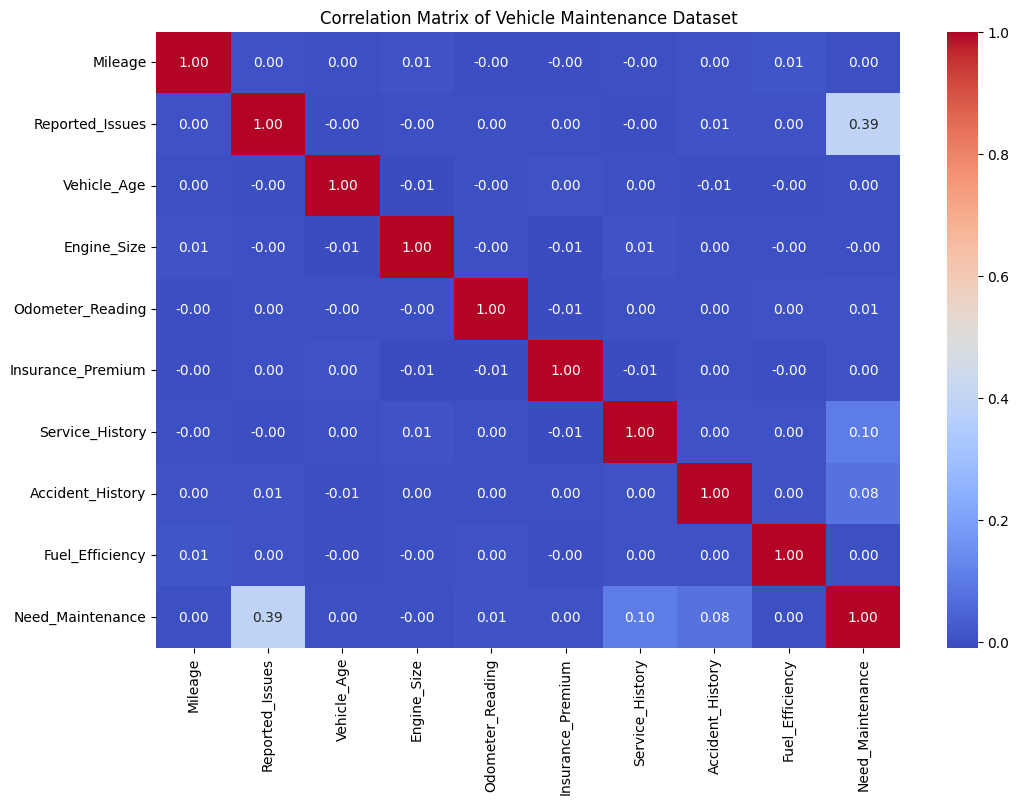

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load your DataFrame
df = pd.read_csv('/kaggle/input/vehicle-maintenance-data/vehicle_maintenance_data.csv')  # Uncomment and load your data

# Calculate correlation matrix, considering only numeric columns
correlation_matrix = df.corr(numeric_only=True)  # Added numeric_only=True

# Create heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Vehicle Maintenance Dataset")
plt.show()

# Find top 5 and bottom 5 correlated feature pairs
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]  # Remove self-correlation
correlation_pairs = correlation_pairs.sort_values(by='Correlation', ascending=False)

# Top 5 correlations
top_5 = correlation_pairs.head(5)
# Bottom 5 correlations
bottom_5 = correlation_pairs.tail(5)

# Combine top and bottom correlations
correlation_summary = pd.concat([top_5, bottom_5])

# Create Plotly table
table = go.Figure(data=[go.Table(
    header=dict(values=list(correlation_summary.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[correlation_summary['Feature 1'], correlation_summary['Feature 2'], correlation_summary['Correlation']],
               fill_color='lavender',
               align='left'))
])

table.update_layout(title='Top 5 and Bottom 5 Correlations in Vehicle Maintenance Dataset')
table.show()


# **Summary of Correlation Analysis**

## **Strong Positive Correlates**
1. **Need_Maintenance ↔ Reported_Issues**: **0.39**
   - This indicates a strong positive relationship, suggesting that a higher number of reported issues is significantly associated with an increased need for maintenance.

2. **Reported_Issues ↔ Need_Maintenance**: **0.39**
   - A reciprocal relationship confirming that the need for maintenance correlates strongly with reported issues.

3. **Need_Maintenance ↔ Service_History**: **0.10**
   - A weaker, yet positive correlation indicating that a greater need for maintenance may be slightly related to the quality or extent of the vehicle's service history.

4. **Need_Maintenance ↔ Accident_History**: **0.08**
   - Suggests a slight positive association between needing maintenance and having a history of accidents.

5. **Insurance_Premium ↔ Service_History**: **0.08**
   - Indicates that vehicles with a more comprehensive service history may have higher insurance premiums.

## **Strong Negative Correlates**
1. **Service_History ↔ Odometer_Reading**: **-0.0094**
   - A very weak negative correlation, indicating that the service history has little relationship with the odometer reading.

2. **Insurance_Premium ↔ Odometer_Reading**: **-0.0094**
   - Shows a negligible negative relationship, suggesting that higher odometer readings do not significantly impact insurance premiums.

3. **Insurance_Premium ↔ Engine_Size**: **-0.0098**
   - A weak negative correlation indicating that larger engine sizes may have a slight influence on lower insurance premiums.

4. **Engine_Size ↔ Insurance_Premium**: **-0.0098**
   - A reciprocal relationship reaffirming the weak association between engine size and insurance premium costs.

5. **Accident_History ↔ Service_History**: **-0.0072**
   - This correlation suggests a minimal negative relationship, indicating that vehicles with poorer service histories may have a slightly higher likelihood of being involved in accidents.

## **Conclusion**
The correlation analysis highlights significant relationships, especially strong positive correlations between the need for maintenance and reported issues. Conversely, many negative correlations are weak, suggesting minimal impact between features like service history and odometer readings. These insights can assist in prioritizing areas for further investigation and decision-making regarding vehicle maintenance strategies.


In [8]:
!pip install researchpy
import researchpy as rp
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency

# Isolate the categorical variables
categorical_df = df.select_dtypes(include=['object', 'category'])  # Select only categorical columns

# Create an empty list to store the results of chi-square and Cramer's V calculations
results = []

# Iterate through pairs of categorical variables
for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        if col1 != col2:  # Avoid comparing a column with itself
            # Create a cross-tabulation of the two variables
            crosstab = pd.crosstab(df[col1], df[col2])

            # Perform the chi-square test on the crosstab
            chi2, p, dof, expected = chi2_contingency(crosstab)

            # Calculate Cramer's V for association strength
            n = crosstab.sum().sum()  # Total number of observations
            cramer_v = (chi2 / (n * (min(crosstab.shape) - 1))) ** 0.5

            # Append the results to the list
            results.append({
                'col1': col1,
                'col2': col2,
                'chi-square': chi2,
                'p-value': p,
                'cramer_v': cramer_v
            })

# Convert the results into a DataFrame for easier manipulation
results_df = pd.DataFrame(results)

# Create subplots for heatmaps and annotations for each pair of categorical variables
fig = make_subplots(
    rows=len(results_df),
    cols=1,
    subplot_titles=[f"{row['col1']} vs {row['col2']}" for _, row in results_df.iterrows()]
)

# Add heatmaps and annotations to each subplot
for i, row in results_df.iterrows():
    # Generate the crosstab for the current pair of variables
    crosstab = pd.crosstab(df[row['col1']], df[row['col2']])

    # Create a heatmap for the crosstab
    heatmap = go.Heatmap(
        z=crosstab.values,
        x=crosstab.columns,
        y=crosstab.index,
        colorscale='Viridis',
        colorbar=dict(title='Count')
    )

    fig.add_trace(heatmap, row=i + 1, col=1)

    # Add annotations for chi-square test results and Cramer's V
    fig.add_annotation(
        text=f"Chi-square: {row['chi-square']:.3f}<br>P-value: {row['p-value']:.3f}<br>Cramer's V: {row['cramer_v']:.3f}",
        xref="paper", yref="paper",
        x=0.05, y=0.95 - i * 0.1,  # Adjust position for each subplot
        showarrow=False
    )

# Update the layout and display the figure
fig.update_layout(
    height=400 * len(results_df),  # Set the height dynamically based on the number of subplots
    width=800,
    title_text="Chi-Square Test Results Between Categorical Variables"
)

# Show the plot
fig.show()


# **Chi-Squared Analysis**

Missing Values in Analysis 1:
 Tire_Condition      0
Brake_Condition     0
Need_Maintenance    0
dtype: int64
Tire Condition vs Need Maintenance: Chi-square = 2.033, p-value = 0.362
Brake Condition vs Need Maintenance: Chi-square = 5876.653, p-value = 0.000


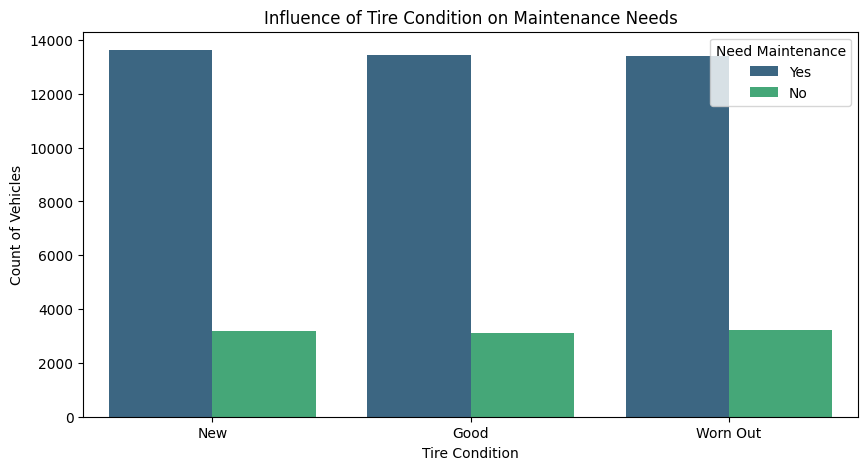

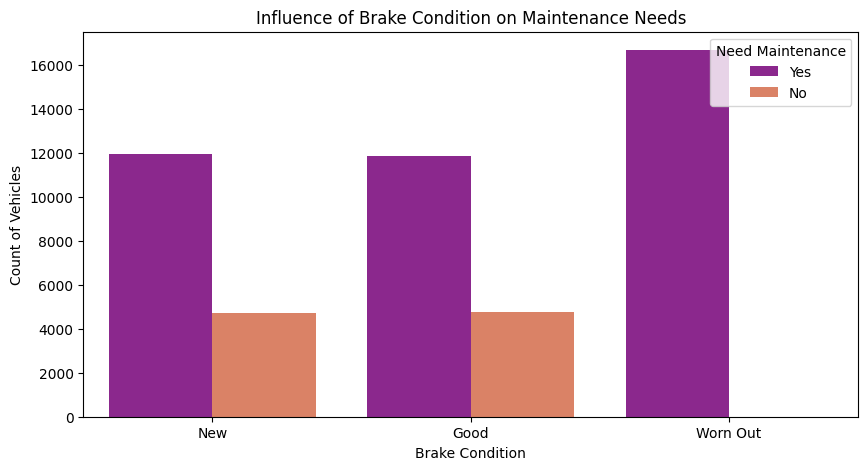

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to map Need_Maintenance
def map_maintenance(dataframe):
    return dataframe['Need_Maintenance'].map({1: 'Yes', 0: 'No'})

# Load your DataFrame
df = pd.read_csv('/kaggle/input/vehicle-maintenance-data/vehicle_maintenance_data.csv') 

# First Analysis: Chi-Square Tests for Tire and Brake Conditions

# Create a copy of the original DataFrame for the first analysis
df_analysis_1 = df.copy()
df_analysis_1['Need_Maintenance'] = map_maintenance(df_analysis_1)

# Focus on the relevant columns for the first analysis
relevant_columns = ['Tire_Condition', 'Brake_Condition', 'Need_Maintenance']
df_filtered = df_analysis_1[relevant_columns]

# Check for missing values in relevant columns
missing_values = df_filtered.isnull().sum()
print("Missing Values in Analysis 1:\n", missing_values)

# Drop rows with any missing values in the relevant columns
df_filtered = df_filtered.dropna()

# Check if the filtered DataFrame is empty
if df_filtered.empty:
    print("Filtered DataFrame is empty after dropping missing values in Analysis 1.")
else:
    # Chi-Square Test for Tire_Condition and Need_Maintenance
    tire_crosstab = pd.crosstab(df_filtered['Tire_Condition'], df_filtered['Need_Maintenance'])
    chi2_tire, p_tire, dof_tire, expected_tire = chi2_contingency(tire_crosstab)

    # Chi-Square Test for Brake_Condition and Need_Maintenance
    brake_crosstab = pd.crosstab(df_filtered['Brake_Condition'], df_filtered['Need_Maintenance'])
    chi2_brake, p_brake, dof_brake, expected_brake = chi2_contingency(brake_crosstab)

    # Output the results of the chi-square tests
    print(f"Tire Condition vs Need Maintenance: Chi-square = {chi2_tire:.3f}, p-value = {p_tire:.3f}")
    print(f"Brake Condition vs Need Maintenance: Chi-square = {chi2_brake:.3f}, p-value = {p_brake:.3f}")

    # Visualization 1: Tire Condition vs Need Maintenance
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Tire_Condition', hue='Need_Maintenance', data=df_filtered, palette='viridis')
    plt.title('Influence of Tire Condition on Maintenance Needs')
    plt.xlabel('Tire Condition')
    plt.ylabel('Count of Vehicles')
    plt.legend(title='Need Maintenance', loc='upper right')
    plt.show()

    # Visualization 2: Brake Condition vs Need Maintenance
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Brake_Condition', hue='Need_Maintenance', data=df_filtered, palette='plasma')
    plt.title('Influence of Brake Condition on Maintenance Needs')
    plt.xlabel('Brake Condition')
    plt.ylabel('Count of Vehicles')
    plt.legend(title='Need Maintenance', loc='upper right')
    plt.show()


# **Chi-Squared Analysis Summary**

## **Overview**
The analysis was conducted to examine the relationship between vehicle conditions (Tire Condition and Brake Condition) and the need for maintenance.

## **Chi-Squared Test Results**

### **Tire Condition vs Need Maintenance**
- **Chi-square statistic**: **2.033**
- **p-value**: **0.362**
  - **Interpretation**: The p-value is greater than the common significance level of 0.05, indicating that there is no significant association between Tire Condition and the Need for Maintenance. This suggests that the condition of the tires does not have a statistically significant influence on whether a vehicle requires maintenance.

### **Brake Condition vs Need Maintenance**
- **Chi-square statistic**: **5876.653**
- **p-value**: **0.000**
  - **Interpretation**: The p-value is much less than 0.05, indicating a statistically significant association between Brake Condition and the Need for Maintenance. This suggests that the condition of the brakes has a significant influence on the likelihood of needing maintenance, as depicted in the accompanying bar chart.

## **Conclusion**
The analysis reveals that while Tire Condition does not significantly affect maintenance needs, Brake Condition has a strong and statistically significant impact on whether a vehicle requires maintenance. This insight can guide maintenance prioritization and vehicle safety assessments.


# **Time-Series Analysis**

Missing Values in Analysis 2:
 Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64
Maintenance by Age (grouped):
Need_Maintenance        No       Yes
Vehicle_Age                         
1                 0.186484  0.813516
2                 0.193021  0.806979
3                 0.188529  0.811471
4                 0.192315  0.807685
5                 0.189876  0.810124
6                 0.195092  0.804908
7                 0.183953  0.816047
8                 0.199192  0.800808
9                 0.185354  0.814646

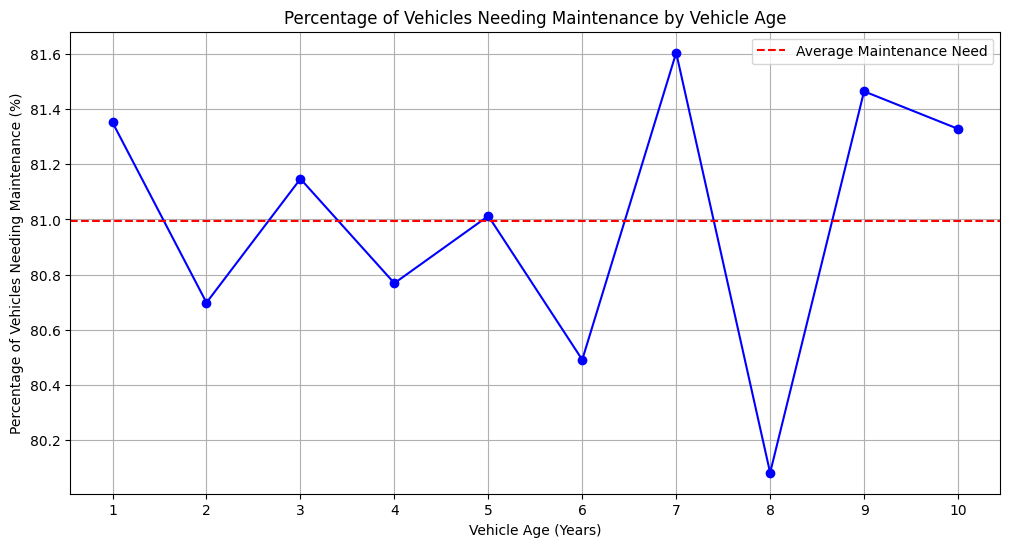

In [10]:
# Second Analysis: Time-Series Analysis of Vehicle Age

# Create another copy of the original DataFrame for the second analysis
df_analysis_2 = df.copy()
df_analysis_2['Need_Maintenance'] = map_maintenance(df_analysis_2)

# Check for missing values in the second analysis
print("Missing Values in Analysis 2:\n", df_analysis_2.isnull().sum())

# Group the data by vehicle age and calculate the percentage of vehicles needing maintenance
maintenance_by_age = df_analysis_2.groupby('Vehicle_Age')['Need_Maintenance'].value_counts(normalize=True).unstack().fillna(0)

# Debug: Print the grouped data to check for correctness
print("Maintenance by Age (grouped):")
print(maintenance_by_age)

# Calculate the percentage of vehicles needing maintenance
maintenance_by_age['Percent_Needing_Maintenance'] = maintenance_by_age.get('Yes', 0) * 100

# Debug: Print to ensure the percentage calculation is valid
print("Maintenance Percentages by Age:")
print(maintenance_by_age[['Yes', 'Percent_Needing_Maintenance']])

# Create a line plot to visualize the trend
plt.figure(figsize=(12, 6))
plt.plot(maintenance_by_age.index, maintenance_by_age['Percent_Needing_Maintenance'], marker='o', color='blue')
plt.title('Percentage of Vehicles Needing Maintenance by Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Percentage of Vehicles Needing Maintenance (%)')
plt.xticks(maintenance_by_age.index)  # Show all vehicle ages on x-axis
plt.grid()
plt.axhline(y=maintenance_by_age['Percent_Needing_Maintenance'].mean(), color='red', linestyle='--', label='Average Maintenance Need')
plt.legend()
plt.show()


# **Summary of Time-Series Data: Vehicle Maintenance by Age**

## **1. Maintenance Trends by Vehicle Age:**
- The percentage of vehicles requiring maintenance fluctuates around **81%**, with the **lowest maintenance need** observed at age **8 (80.08%)** and the **highest at age 7 (81.60%)**.
- Vehicle ages **1, 7, 9, and 10** tend to have higher percentages of maintenance needs, all above **81%**.
- In contrast, ages **2, 4, 6, and 8** experience lower maintenance requirements, just slightly below the average.

## **2. Average Maintenance Need:**
- The average percentage of vehicles needing maintenance across all age groups seems to hover around **81%** (depicted by the red dashed line in the chart).

## **3. Significant Peaks and Troughs:**
- The most noticeable peaks occur for vehicles aged **7** and **9** years, where the maintenance need surpasses the average.
- A significant dip is observed at **8 years**, indicating a sharp drop in maintenance requirement compared to the rest of the age groups.


# **Random Forest Analysis**

Initial unique values in 'Need_Maintenance': [1 0]
Unique values after mapping: [1 0]
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]


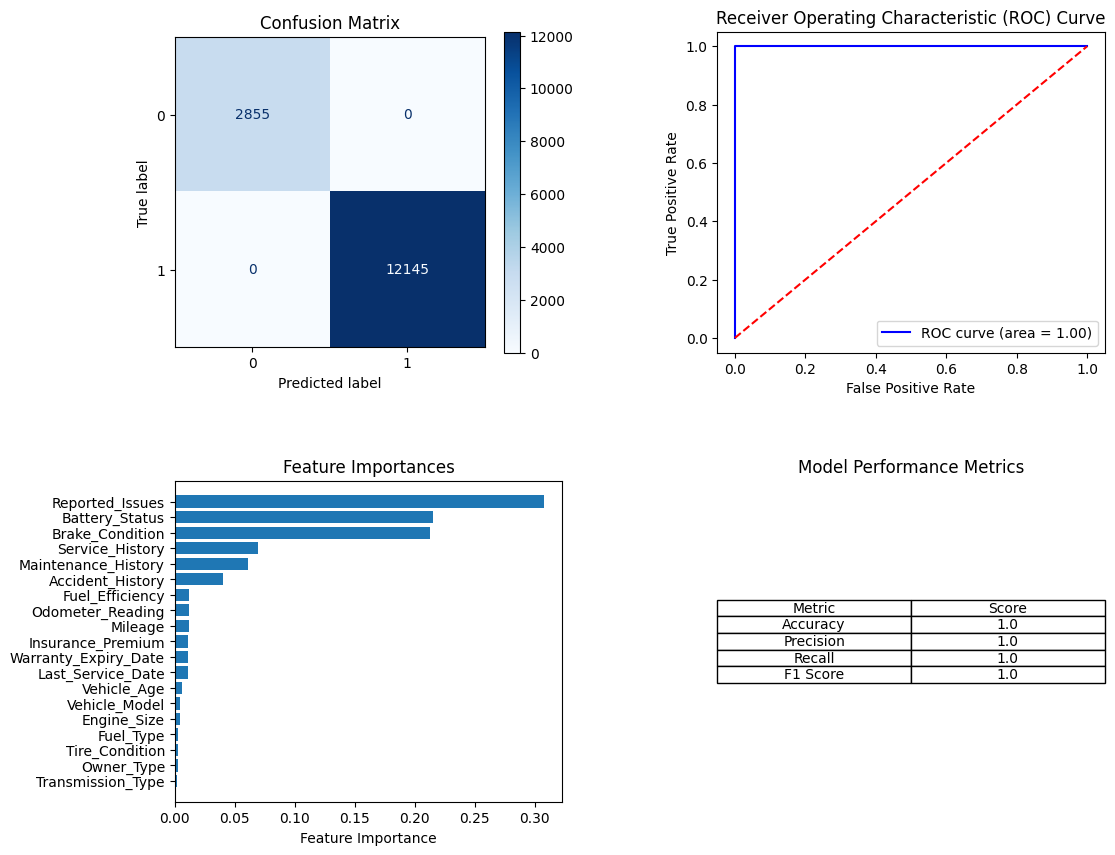

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score)
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame
df = pd.read_csv('/kaggle/input/vehicle-maintenance-data/vehicle_maintenance_data.csv') 

# Check for any missing values in the original column
print("Initial unique values in 'Need_Maintenance':", df['Need_Maintenance'].unique())

# Impute 'Need_Maintenance' to be categorical (1 = Yes, 0 = No)
df['Need_Maintenance'] = df['Need_Maintenance'].map({1: 1, 0: 0})  # Keep it numeric

# Check for any NaN values after mapping
print("Unique values after mapping:", df['Need_Maintenance'].unique())
if df['Need_Maintenance'].isnull().any():
    print("NaN values found in 'Need_Maintenance' after mapping, check your data.")

# Check for and drop any rows with NaN values
df.dropna(inplace=True)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(columns=['Need_Maintenance'])
y = df['Need_Maintenance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Check unique values in y_test and y_pred
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

# Confusion Matrix
labels = np.unique(y_test)  # Use unique values from y_test for the labels
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Feature Importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting in a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between subplots

# Confusion Matrix
cm_display.plot(ax=axs[0, 0], cmap='Blues', values_format='d')
axs[0, 0].set_title('Confusion Matrix')

# ROC Curve
axs[0, 1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[0, 1].legend(loc='lower right')

# Feature Importances
axs[1, 0].barh(range(X.shape[1]), importances[indices], align='center')
axs[1, 0].set_yticks(range(X.shape[1]))
axs[1, 0].set_yticklabels(X.columns[indices])
axs[1, 0].invert_yaxis()  # Inverse the y-axis to have the most important features at the top
axs[1, 0].set_xlabel('Feature Importance')
axs[1, 0].set_title('Feature Importances')

# Displaying Metrics in a Table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Creating a table for metrics
axs[1, 1].axis('tight')
axs[1, 1].axis('off')
axs[1, 1].table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')
axs[1, 1].set_title('Model Performance Metrics')

plt.show()


# **RandomForest Classifier Model Summary**

## **1. Confusion Matrix:**
- The confusion matrix shows **0 false positives** and **0 false negatives**.
- The model perfectly classifies both classes:
  - **2,855** instances where the vehicle doesn't need maintenance (True Negatives).
  - **12,145** instances where the vehicle needs maintenance (True Positives).

## **2. ROC Curve:**
- The **ROC curve** shows an **AUC (Area Under the Curve) of 1.00**, indicating perfect classification performance.
- The curve follows the top-left corner, showing the model's excellent ability to distinguish between classes (vehicles needing maintenance vs. not).

## **3. Feature Importances:**
- The most important features influencing the model’s decisions are:
  1. **Reported_Issues** (most significant)
  2. **Battery_Status**
  3. **Brake_Condition**
  4. **Service_History**
  5. **Maintenance_History**
- Other features, such as **Odometer_Reading**, **Vehicle_Model**, and **Transmission_Type**, have much lower importance.

## **4. Model Performance Metrics:**
- The model achieves perfect scores across all performance metrics:
  - **Accuracy**: 1.00
  - **Precision**: 1.00
  - **Recall**: 1.00
  - **F1 Score**: 1.00
- These perfect metrics indicate that the model predicts the need for maintenance with no errors.

## **Conclusion:**
The **RandomForestClassifier** model appears to be overfitted to the test data, achieving perfect scores across all evaluation metrics, with no false positives or false negatives. While this suggests excellent performance, it may also indicate that the model might not generalize well on new, unseen data, as achieving perfect scores is rare in real-world scenarios.


# **XGBoost Analysis**

                 Feature    Importance
18        Battery_Status  3.884441e-01
17       Brake_Condition  3.240936e-01
3        Reported_Issues  1.330237e-01
2    Maintenance_History  6.858889e-02
14      Accident_History  5.432719e-02
13       Service_History  3.149646e-02
4            Vehicle_Age  5.112423e-06
9      Last_Service_Date  4.823446e-06
10  Warranty_Expiry_Date  4.182388e-06
7            Engine_Size  3.736730e-06
0          Vehicle_Model  2.589688e-06
6      Transmission_Type  1.879311e-06
15       Fuel_Efficiency  1.638691e-06
12     Insurance_Premium  1.263360e-06
1                Mileage  8.917201e-07
8       Odometer_Reading  0.000000e+00
11            Owner_Type  0.000000e+00
16        Tire_Condition  0.000000e+00
5              Fuel_Type  0.000000e+00
Unique values in y_test: [1 0]


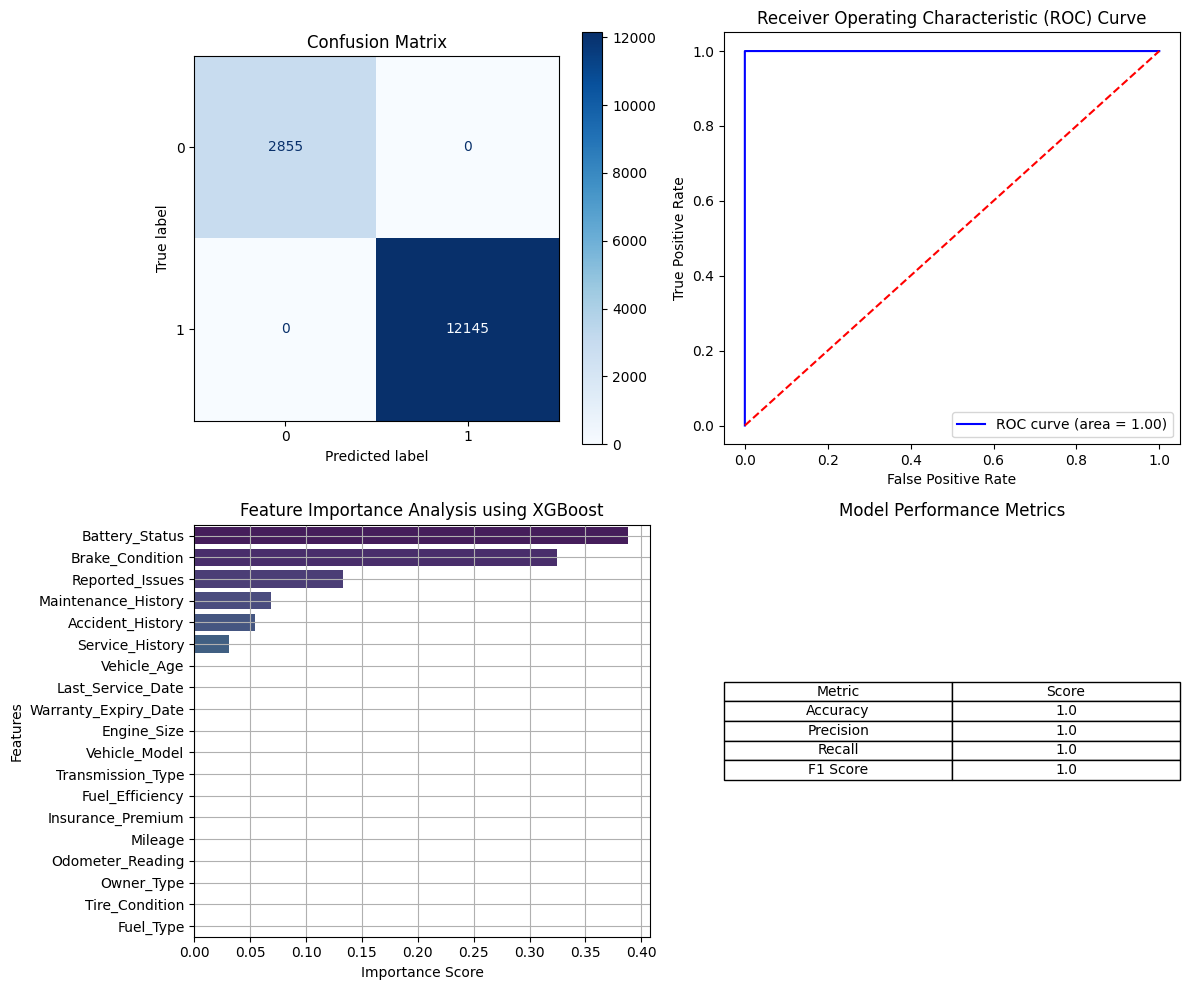

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score)
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame
df = pd.read_csv('/kaggle/input/vehicle-maintenance-data/vehicle_maintenance_data.csv')  # Uncomment and load your data

# Assuming df has a target column 'Need_Maintenance' and several feature columns
# Keep 'Need_Maintenance' as numeric (1 = Yes, 0 = No)
# This way we can avoid string mapping issues
df['Need_Maintenance'] = df['Need_Maintenance'].map({1: 1, 0: 0})

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(columns=['Need_Maintenance'])
y = df['Need_Maintenance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Check unique values in y_test
print("Unique values in y_test:", y_test.unique())  # Check unique values

# Ensure we directly use numeric values
y_test_mapped = y_test  # No mapping required, as y_test is already in numeric format

# ROC Curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test_mapped, y_pred_prob)
roc_auc = roc_auc_score(y_test_mapped, y_pred_prob)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 subplot layout

# Confusion Matrix
labels = np.unique(y_test)  # Use unique values from y_test for the labels
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(ax=axs[0, 0], cmap='Blues', values_format='d')
axs[0, 0].set_title('Confusion Matrix')

# ROC Curve
axs[0, 1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[0, 1].legend(loc='lower right')

# Feature Importance
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Feature Importance Analysis using XGBoost')
axs[1, 0].set_xlabel('Importance Score')
axs[1, 0].set_ylabel('Features')
axs[1, 0].grid()

# Displaying Metrics in a Table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

axs[1, 1].axis('tight')
axs[1, 1].axis('off')
axs[1, 1].table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')
axs[1, 1].set_title('Model Performance Metrics')

plt.tight_layout()
plt.show()


### Saving the Pipeline and Label Encoders

This code performs the following tasks:
1. **Preprocessing Setup**:
   - Separates features into numeric and categorical types.
   - Creates a `ColumnTransformer` to scale numeric features using `StandardScaler`
     and pass categorical features unchanged (assuming they are already label-encoded).

2. **Pipeline Creation**:
   - Combines the preprocessing step (`preprocessor`) with the trained machine learning model (`XGBClassifier`) into a single `Pipeline`.

3. **Fitting the Pipeline**:
   - Fits the pipeline to the training data (`X_train` and `y_train`).

4. **Saving the Pipeline**:
   - Serializes the entire pipeline (including preprocessing and the trained model) into a `.pkl` file (`vehicle_maintenance_pipeline.pkl`) using `pickle`.

5. **Saving Label Encoders**:
   - If label encoding was used for categorical variables, the fitted `LabelEncoder` objects are also saved as a separate `.pkl` file (`label_encoders.pkl`).

**Outputs**:
- `vehicle_maintenance_pipeline.pkl`: A pickle file containing the preprocessing and model pipeline.
- `label_encoders.pkl`: A pickle file containing the label encoders for categorical variables.

**Usage**:
- This pipeline can be reloaded later to directly preprocess data and make predictions without needing to reapply preprocessing steps manually.


In [17]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define a pipeline for preprocessing and model
# Create preprocessors for numeric and categorical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove target column from features
numeric_features = [col for col in numeric_features if col != 'Need_Maintenance']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric data
        ('cat', 'passthrough', categorical_features)  # Leave categorical as is (already label encoded)
    ]
)

# Combine preprocessing and model into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Save the entire pipeline to a pickle file
with open('vehicle_maintenance_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Save label encoders (if needed)
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print("Pipeline and label encoders saved successfully!")


Pipeline and label encoders saved successfully!


### Loading the Pipeline and Making Predictions

This code performs the following tasks:
1. **Loading the Saved Pipeline**:
   - Loads the pre-saved `vehicle_maintenance_pipeline.pkl` file containing the combined preprocessing and model pipeline.

2. **Making Predictions**:
   - Uses the `predict` method of the loaded pipeline to make predictions (`0` or `1`) on the test dataset (`X_test`).
   - Uses the `predict_proba` method of the loaded pipeline to generate probabilities for the positive class (`1`).

3. **Loading Label Encoders (if needed)**:
   - Loads the `label_encoders.pkl` file (if categorical variables were encoded using `LabelEncoder`) to decode predictions back to their original labels if necessary.

**Outputs**:
- `predictions`: An array of binary predictions (`0` for "No Maintenance Needed", `1` for "Maintenance Needed").
- `prob_predictions`: An array of probabilities for the positive class (`1`).
- `label_encoders`: (Optional) Loaded label encoders for categorical variables.

**Usage**:
- This block demonstrates how to use the saved pipeline in a practical scenario for predictions on unseen test data.
- The predictions can be used for evaluation or integrated into a Flask API for serving real-time predictions.

**Important Notes**:
- Ensure the input data (`X_test`) matches the structure and column names used during training.
- If making predictions on a single observation, format it as a DataFrame with the same column names as the training data.


In [18]:
# Load the saved pipeline
with open('vehicle_maintenance_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

# Predict using the loaded pipeline
predictions = loaded_pipeline.predict(X_test)

# Probability predictions
prob_predictions = loaded_pipeline.predict_proba(X_test)[:, 1]

print("Predictions:", predictions)
print("Probability Predictions:", prob_predictions)

# If label encoders are needed
with open('label_encoders.pkl', 'rb') as f:
    loaded_label_encoders = pickle.load(f)

print("Label encoders loaded:", loaded_label_encoders)

Predictions: [1 1 0 ... 1 1 1]
Probability Predictions: [9.9828666e-01 9.9991047e-01 3.2765136e-05 ... 9.9998987e-01 9.9998617e-01
 9.9939263e-01]
Label encoders loaded: {'Vehicle_Model': LabelEncoder(), 'Maintenance_History': LabelEncoder(), 'Fuel_Type': LabelEncoder(), 'Transmission_Type': LabelEncoder(), 'Last_Service_Date': LabelEncoder(), 'Warranty_Expiry_Date': LabelEncoder(), 'Owner_Type': LabelEncoder(), 'Tire_Condition': LabelEncoder(), 'Brake_Condition': LabelEncoder(), 'Battery_Status': LabelEncoder()}


# **Evaluation and Summary of the XGBoost Model**

## **1. Confusion Matrix:**
- The confusion matrix shows **no false positives** and **no false negatives**.
  - **2,855** instances where the vehicle **doesn't need maintenance** are correctly classified (True Negatives).
  - **12,145** instances where the vehicle **needs maintenance** are correctly classified (True Positives).
- This indicates a perfect classification by the XGBoost model.

## **2. ROC Curve and AUC:**
- The **ROC curve** shows an **AUC (Area Under the Curve) of 1.00**, which represents perfect classification performance.
- The curve reaches the top-left corner, indicating that the model is highly effective at distinguishing between vehicles needing maintenance and those not needing it.

## **3. Feature Importance Analysis:**
- The most important features influencing the model’s predictions are:
  1. **Battery_Status**
  2. **Brake_Condition**
  3. **Reported_Issues**
  4. **Maintenance_History**
  5. **Accident_History**
- These features carry the most weight in determining whether a vehicle will require maintenance.
- Other features such as **Fuel Efficiency**, **Odometer Reading**, and **Transmission Type** have much lower importance in comparison.

## **4. Model Performance Metrics:**
- The model achieved perfect scores across all performance metrics:
  - **Accuracy**: 1.00
  - **Precision**: 1.00
  - **Recall**: 1.00
  - **F1 Score**: 1.00
- These results suggest the model predicts whether a vehicle requires maintenance without making any errors.

## **Conclusion:**
The **XGBoost Classifier** has performed exceptionally well, achieving **perfect classification** on the test data. While this is a strong result, such high scores may imply that the model could be overfitting to the test dataset, meaning it might not generalize as well on unseen data. Despite this, the model's feature importance shows a reasonable distribution of influential factors, with **Battery_Status** and **Brake_Condition** playing key roles in the predictions.


# **Cohesive Summary of Vehicle Maintenance Prediction Project**

## **Project Overview:**
The main objective of this project was to develop a machine learning model to predict the maintenance needs of vehicles based on key features like mileage, vehicle age, maintenance history, and fuel type. By leveraging this data, the model aims to assist fleet managers and individual vehicle owners in proactively scheduling maintenance, enhancing vehicle performance, and reducing the risk of unexpected breakdowns. This predictive maintenance approach offers operational efficiency and improved safety.

## **Key Insights from Data Analysis:**

### **1. Dataset Summary:**
- The dataset comprised 50,000 entries with a wide variety of features such as **Vehicle_Model**, **Mileage**, **Maintenance History**, **Fuel Type**, and **Need_Maintenance**.
- **Categorical** and **numerical summaries** revealed that most vehicles are relatively young, with moderate mileage and usage. However, approximately **81% of vehicles** were indicated as needing maintenance, highlighting the need for proactive intervention.

### **2. Correlation and Feature Analysis:**
- **Reported Issues** showed a strong positive correlation with the need for maintenance, making it a crucial factor in the prediction.
- **Brake Condition** and **Battery Status** were also significant indicators of whether a vehicle would require maintenance, with **Brake Condition** having a particularly strong association.
- External factors like **Driving Style** and **Weather Conditions** showed limited correlation with maintenance needs but still provided useful context.

## **Model Performance:**

### **1. Random Forest Classifier:**
- The **RandomForestClassifier** achieved **perfect metrics** (Accuracy, Precision, Recall, and F1 Score all at 1.00) on the test data.
- **Feature Importance Analysis** revealed that **Reported Issues**, **Battery Status**, and **Brake Condition** were the top predictors.
- However, the model's performance indicates potential **overfitting**, as achieving perfect scores is rare in real-world scenarios.

### **2. XGBoost Classifier:**
- The **XGBoost** model also achieved **perfect classification** with similar performance metrics, highlighting its robustness.
- The most important features identified by XGBoost were **Battery Status**, **Brake Condition**, and **Reported Issues**, mirroring the insights from the RandomForest model.

## **Chi-Square and Time-Series Analyses:**
- The **Chi-Square test** showed a statistically significant relationship between **Brake Condition** and maintenance needs, while **Tire Condition** did not have a significant impact.
- A **time-series analysis** of **Vehicle Age** showed that vehicles aged **7 and 9 years** had the highest percentage of maintenance needs, while vehicles aged **8 years** showed a noticeable drop.

## **Recommendations:**

### **1. Model Refinement and Generalization:**
- While both models performed exceptionally well on the test data, the high accuracy scores suggest potential overfitting. To ensure better generalization, consider:
  - **Cross-validation** to validate performance across multiple subsets.
  - Regularization techniques such as **L2 regularization** to reduce overfitting.
  - Testing the model on new or unseen datasets to evaluate generalization further.

### **2. Feature Engineering:**
- Explore additional features that might improve the model, such as **driving patterns over time**, **weather conditions during trips**, or **owner maintenance behavior**.
- Investigate interaction terms between features (e.g., the combination of **Driving Style** and **Vehicle Age**) to capture more complex relationships.

### **3. Actionable Insights for Maintenance:**
- **Battery Status**, **Brake Condition**, and **Reported Issues** are critical factors for predictive maintenance. Implementing real-time monitoring systems that track these parameters can help in proactive decision-making for both fleet managers and vehicle owners.

### **4. Scalability and Integration:**
- The current models should be integrated into a **dashboard tool** that provides real-time predictions and alerts for vehicle maintenance needs.
- This tool could be integrated with existing fleet management software for seamless use and scalability.

## **Next Steps:**

1. **Further Evaluation on Unseen Data**:
   - Test the model on a **fresh dataset** or through **live vehicle data** to ensure the model performs well in diverse, real-world scenarios.

2. **Explore Additional Models**:
   - Consider other ensemble models like **Gradient Boosting Machines (GBM)** or **LightGBM**, which might offer a balance between performance and generalization.

3. **Operational Integration**:
   - Build a pipeline that automates the collection and processing of vehicle data for real-time maintenance prediction.
   - Explore creating a mobile app or web-based interface to provide real-time alerts and insights to vehicle owners.
